[![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)](https://fixelalgorithms.gitlab.io)

# Machine Learning Methods

## Supervised Learning - Classification Performance Scores / Metrics: Precision, Recall, ROC and AUC 

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.002 | 12/05/2025 | Royi Avital | Added comparison of the _F1_ vs. _Balanced Accuracy_ scores        |
| 1.0.001 | 20/03/2024 | Royi Avital | Renamed the `AUC` variable                                         |
| 1.0.000 | 14/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0035PerformanceScoreMetrics.ipynb)

In [ ]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import make_moons
from sklearn.metrics import auc, balanced_accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve
from sklearn.svm import SVC

# Image Processing

# Machine Learning

# Miscellaneous
import math
import os
from platform import python_version
import random

# Typing
from typing import Callable, Dict, List, Optional, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from ipywidgets import Dropdown, FloatSlider, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

```python
valToFill = ???
```

 - Multi Line to Fill (At least one)

```python
# You need to start writing
?????
```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

?????
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

In [4]:
# Courses Packages

from DataVisualization import PlotBinaryClassData, PlotConfusionMatrix, PlotLabelsHistogram


In [ ]:
# General Auxiliary Functions


In [6]:
# Parameters

# Data Generation
numSamples0 = 950
numSamples1 = 50

noiseLevel = 0.1

# Test / Train Loop
testSize = 0.5

# Model
paramC      = 1
kernelType  = 'linear'

# Data Visualization
numGridPts = 250


## Generate / Load Data


In [7]:
# Load Data 

mX, vY = make_moons(n_samples = (numSamples0, numSamples1), noise = noiseLevel)

print(f'The features data shape: {mX.shape}')
print(f'The labels data shape: {vY.shape}')
print(f'The unique values of the labels: {np.unique(vY)}')

The features data shape: (1000, 2)
The labels data shape: (1000,)
The unique values of the labels: [0 1]


### Plot Data

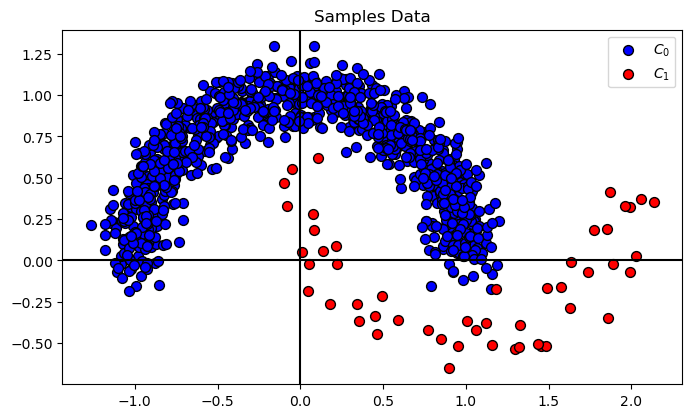

In [8]:
# Plot the Data

# Class Indices
vIdx0 = vY == 0
vIdx1 = vY == 1

hA = PlotBinaryClassData(mX, vY, axisTitle = 'Samples Data')

### Distribution of Labels

When dealing with classification, it is important to know the balance between the labels within the data set.

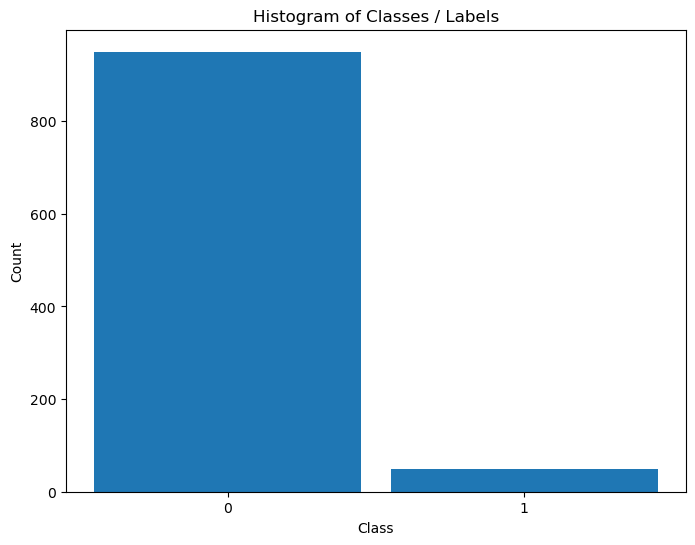

In [9]:
# Distribution of Labels

hA = PlotLabelsHistogram(vY)
plt.show()

* <font color='brown'>(**#**)</font> The data above is highly _Imbalanced / Unbalanced Data_. It happens
* <font color='brown'>(**#**)</font> _Imbalanced Data_, while being frequent in real world problems, requires delicate handling both in metric and model tuning.

## Train SVM Classifier

In [10]:
# SVM Linear Model
oSVM  = SVC(C = paramC, kernel = kernelType).fit(mX, vY) #<! We can do the training in a one liner (Chaining)
modelScore = oSVM.score(mX, vY)

print(f'The model score (Accuracy) on the data: {modelScore:0.2%}') #<! Accuracy

The model score (Accuracy) on the data: 97.40%


### Plot Decision Boundary

We'll display, the linear, decision boundary of the classifier.

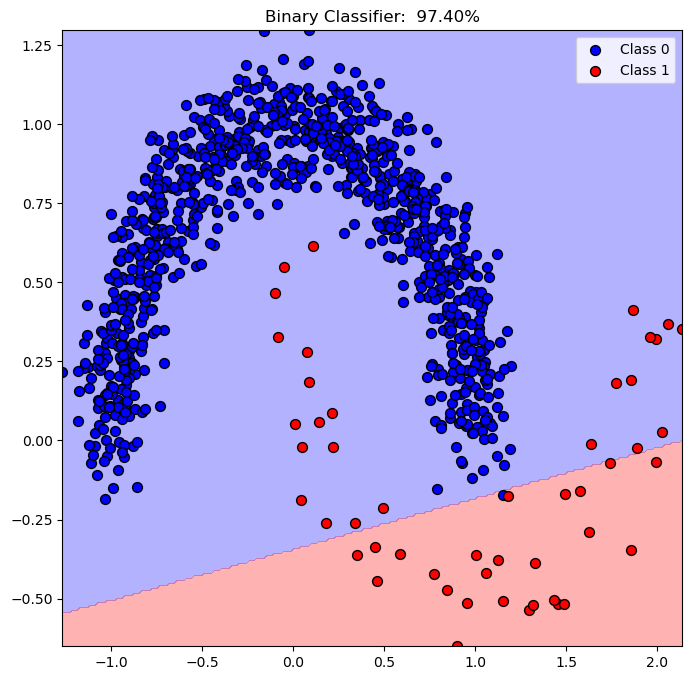

In [11]:
# Grid of the data support
v0       = np.linspace(mX[:, 0].min(), mX[:, 0].max(), numGridPts)
v1       = np.linspace(mX[:, 1].min(), mX[:, 1].max(), numGridPts)
XX0, XX1 = np.meshgrid(v0, v1)
XX       = np.c_[XX0.ravel(), XX1.ravel()]

Z = oSVM.predict(XX)
Z = Z.reshape(XX0.shape)

hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)
hA.contourf(XX0, XX1, Z, colors = CLASS_COLOR, alpha = 0.3, levels = [-0.5, 0.5, 1.5])
hA.scatter(mX[vIdx0, 0], mX[vIdx0, 1], s = ELM_SIZE_DEF, c = CLASS_COLOR[0], edgecolor = EDGE_COLOR, label = 'Class 0')
hA.scatter(mX[vIdx1, 0], mX[vIdx1, 1], s = ELM_SIZE_DEF, c = CLASS_COLOR[1], edgecolor = EDGE_COLOR, label = 'Class 1')
hA.set_title(f'Binary Classifier: {oSVM.score(mX, vY): 0.2%}')
hA.legend()
plt.show()

* <font color='red'>(**?**)</font> Describe the decision score of the points.

## Performance Metrics / Scores

Metrics / Scores are not limited as the loss of the model.  
Their role are:
 
 * Reflect the real world effect of the model.
 * A method to optimize _hyper parameters_ (Model selection included).

The requirements of the model are usually set by scores before the actual work is done.

* <font color='brown'>(**#**)</font> While in the course we introduce the _classic_ metrics. In practice use what makes sense.  
  For instance, for autonomous driving model the score can be number of accidents per 1,000,000 [Kilo Meter].

### Display the Confusion Matrix

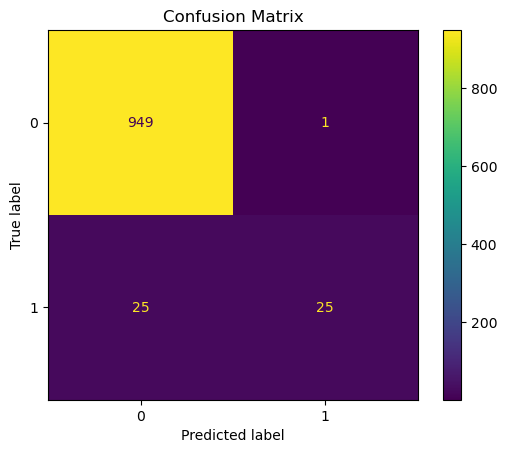

In [12]:
# Plot the Confusion Matrix

PlotConfusionMatrix(vY, oSVM.predict(mX), lLabels = oSVM.classes_)
plt.show()

### Compute the Scores: Precision, Recall and F1

In [13]:
# Calculating the Scores
vHatY                    = oSVM.predict(mX)
precision, recall, f1, _ = precision_recall_fscore_support(vY, vHatY, pos_label = 1, average = 'binary')

print(f'Precision = {precision:0.3f}')
print(f'Recall    = {recall:0.3f}'   )
print(f'f1        = {f1:0.3f}'       )

Precision = 0.962
Recall    = 0.500
f1        = 0.658


* <font color='red'>(**?**)</font> What would be the values of the scores if the accuracy was `100%`?
* <font color='brown'>(**#**)</font> In the context of _signal processing_ (RADAR, Communication) _recall_ is called _PD_ (Probability of Detection).

### Balanced Accuracy

Defined as:

$$ \texttt{Balanced Accuracy} = \frac{1}{2} \left( \frac{TP}{TP + FN} + \frac{TN}{TN + FP} \right) $$

Which is the average of _sensitivity_ (True Positive Rate) and _specificity_ (True Negative Rate).  
Alternatively, can be thought and calculated as the _recall_ per class (For _Multi Class_).

<!-- ![](https://i.imgur.com/cYs3Qqs.png) -->

* <font color='brown'>(**#**)</font> See [Wikipedia - Sensitivity and Specificity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity).

In [14]:
# Balanced Accuracy: Average of TPR (Recall / Sensitivity) and TNR (Specificity)
_, specificity, _, _   = precision_recall_fscore_support(vY, vHatY, pos_label = 0, average = 'binary') #<! Pay attention to the definition of `pos_label`

bAcc = 0.5 * (recall + specificity)

print(f'Accuracy          = {modelScore:0.2%}')
print(f'Balanced Accuracy = {bAcc:0.2%}')

Accuracy          = 97.40%
Balanced Accuracy = 74.95%


In [15]:
# SciKit Learn Balanced Accuracy
# The `balanced_accuracy_score` can be used in binary and multi class cases.

print(f'Balanced Accuracy = {balanced_accuracy_score(vY, vHatY):0.2%}')

Balanced Accuracy = 74.95%


### Balanced Accuracy vs. F1

It seems both target imbalanced data yet they are different in their behaviors.  
This section analyze their effect based on teh measures they rely on: _Recall_ and _Precision_.

In [ ]:
# Analysis of the Scores F1 vs. Balanced Accuracy

vP = np.linspace(0, 1, 1_000)
vR = np.linspace(0, 1, 1_000)

# Broadcast the vectors
vP = vP[None, :] #<! Row Vector
vR = vR[:, None] #<! Column Vector

mS = np.where((vP + vR) > 0, vP + vR, 1e-9) #<! Avoid division by zero

mA  = 0.5 * (vP + vR)    #<! Balanced Accuracy: Average of Precision and Recall
mF1 = 2 * (vP * vR) / mS #<! F1 Score: Harmonic Mean of Precision and Recall

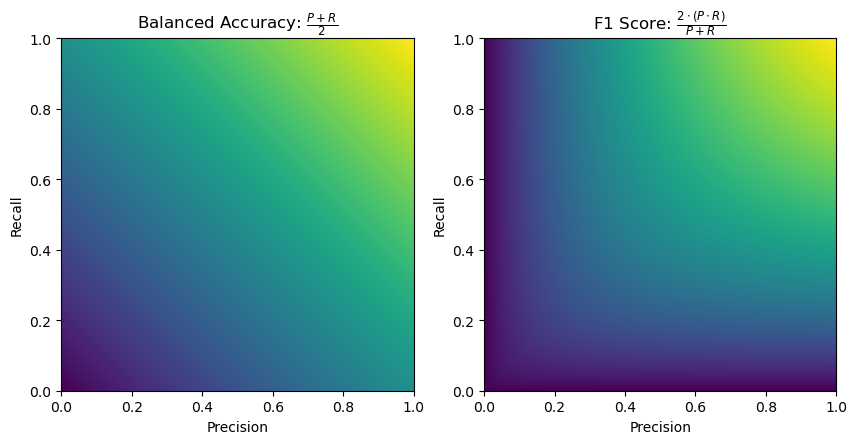

In [17]:
# Plot the Scores as a Function of Precision and Recall
hF, vHa = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 7))
vHa = vHa.flat

hA = vHa[0]
hA.imshow(mA, vmin = 0, vmax = 1, aspect = 'equal', extent = (0, 1, 0, 1), origin = 'lower')
hA.set_title(r'Balanced Accuracy: $\frac{P + R}{2}$')
hA.set_xlabel('Precision')
hA.set_ylabel('Recall');

hA = vHa[1]
hA.imshow(mF1, vmin = 0, vmax = 1, aspect = 'equal', extent = (0, 1, 0, 1), origin = 'lower')
hA.set_title(r'F1 Score: $\frac{2 \cdot (P \cdot R)}{P + R}$')
hA.set_xlabel('Precision')
hA.set_ylabel('Recall');

* <font color='red'>(**?**)</font> Compare what happens in the score of each when improving only Precision or Recall.  
  Specifically, start from `(0, 0)` and go right, left or diagonally.
* <font color='brown'>(**#**)</font> The `F1` is considered to be pessimist score. It requires both Precision and Recall to excel.

### ROC and AUC

* <font color='brown'>(**#**)</font> See [Tom Fawcett - An Introduction to ROC Analysis](https://www.sciencedirect.com/science/article/abs/pii/S016786550500303X).
* <font color='brown'>(**#**)</font> Point metrics like _Precision_, _Recall_, and _F1_ score are calculated using a set of predictions of the classifier.  
  That means one must pick a specific decision threshold (_Working Point_). Changing the threshold changes the score.
* <font color='brown'>(**#**)</font> Metrics (Non Point) like _ROC Curve_ evaluates the classifier over different decision thresholds. They are calculated using prediction probabilities (Scores).
* <font color='brown'>(**#**)</font> Point Metrics like _Area Under ROC Curve_ (AUCROC) can be thought as averaging the performance of the model at different working points. 
* <font color='brown'>(**#**)</font> See [Measuring Performance: AUC (AUROC)](https://glassboxmedicine.com/2019/02/23/measuring-performance-auc-auroc), [Measuring Performance: AUPRC and Average Precision](https://glassboxmedicine.com/2019/03/02/measuring-performance-auprc).

In [18]:
# Calculating the AUC
vScore         = oSVM.decision_function(mX) #<! Values proportional to distance from the separating hyperplane
vFP, vTP, vThr = roc_curve(vY, vScore, pos_label = 1)
valAUC         = auc(vFP, vTP)

print(f'AUC = {valAUC}')

AUC = 0.954821052631579


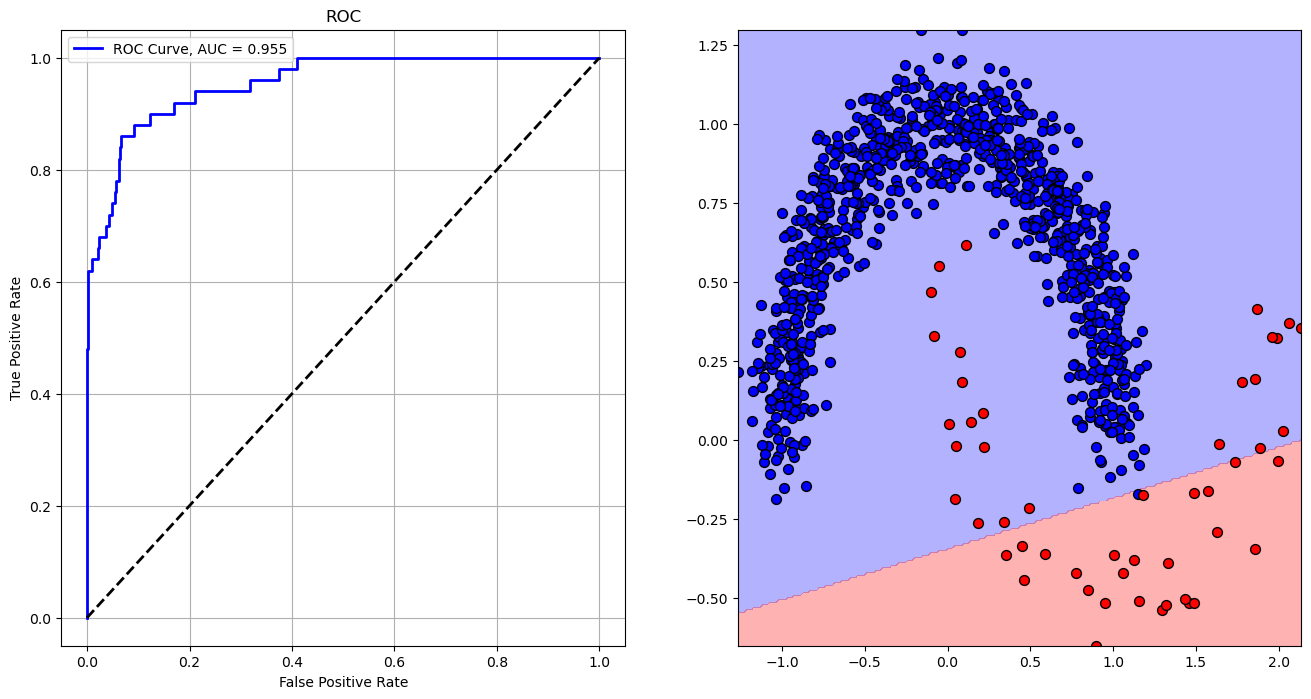

In [19]:
# Plotting the ROC

hF, vHA = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8))

hA = vHA.flat[0]
hA.plot(vFP, vTP, color = 'b', lw = 2, label = f'ROC Curve, AUC = {valAUC:.3f}')
hA.plot([0, 1], [0, 1], color = 'k', lw = 2, linestyle = '--')
hA.set_xlabel('False Positive Rate')
hA.set_ylabel('True Positive Rate')
hA.set_title('ROC')
hA.grid()
hA.legend()

hA = vHA.flat[1]
hA.contourf(XX0, XX1, Z, colors = CLASS_COLOR, alpha = 0.3, levels = [-0.5, 0.5, 1.5])
hA.scatter(mX[vIdx0, 0], mX[vIdx0, 1], s = ELM_SIZE_DEF, c = CLASS_COLOR[0], edgecolor = EDGE_COLOR)
hA.scatter(mX[vIdx1, 0], mX[vIdx1, 1], s = ELM_SIZE_DEF, c = CLASS_COLOR[1], edgecolor = EDGE_COLOR)

plt.show()

In [ ]:
vScore = oSVM.decision_function(XX)
mScore = vScore.reshape(XX0.shape)

def PlotRoc(idx):
    _, vAx = plt.subplots(1, 2, figsize = (14, 6))
    hA = vAx[0]
    hA.plot(vFP, vTP, color = 'b', lw = 3, label = f'AUC = {valAUC:.3f}')
    hA.plot([0, 1], [0, 1], color = 'k', lw = 2, linestyle = '--')
    hA.axvline(x = vFP[idx], color = 'g', lw = 2, linestyle = '--')
    hA.set_xlabel('False Positive Rate')
    hA.set_ylabel('True Positive Rate')
    hA.set_title ('ROC' f'\n$\\alpha = {vThr[idx]}$')
    hA.axis('equal')
    hA.legend()
    hA.grid()    
    
    Z  = mScore > vThr[idx]
    hA = vAx[1]
    hA.contourf(XX0, XX1, Z, colors = CLASS_COLOR, alpha = 0.3, levels = [0, 0.5, 1.0])
    hA.scatter(mX[vIdx0, 0], mX[vIdx0, 1], s = ELM_SIZE_DEF, c = CLASS_COLOR[0], edgecolor = EDGE_COLOR)
    hA.scatter(mX[vIdx1, 0], mX[vIdx1, 1], s = ELM_SIZE_DEF, c = CLASS_COLOR[1], edgecolor = EDGE_COLOR)

    plt.show()

In [21]:
idxSlider = IntSlider(min = 0, max = len(vThr) - 1, step = 1, value = 0, layout = Layout(width = '30%'))
interact(PlotRoc, idx = idxSlider)

plt.show()

interactive(children=(IntSlider(value=0, description='idx', layout=Layout(width='30%'), max=43), Output()), _d…

* <font color='brown'>(**#**)</font> An alternative, is some cases better for imbalanced data, is the performance curve using Precision Recall Curve.  
  See: [Precision Recall Gain Curves: PR Analysis Done Right](https://papers.nips.cc/paper_files/paper/2015/hash/33e8075e9970de0cfea955afd4644bb2-Abstract.html), [The Effect of Class Imbalance on Precision Recall Curves](https://arxiv.org/abs/2007.01905), [`precision_recall_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html).
* <font color='brown'>(**#**)</font> Important property: A classifier uniformly dominates another classifier in the ROC Curve if and only if it dominates it in the Precision Recall Curve.  
  See [The Relationship between Precision Recall and ROC Curves](https://dl.acm.org/doi/10.1145/1143844.1143874) Theorem 3.2.
* <font color='brown'>(**#**)</font> Great discussion on ROC and PR Curves: [StackExchange Statistics (Cross Validated) - ROC vs Precision Recall Curves](https://stats.stackexchange.com/questions/7207).

### Understanding the AUC

The AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example:

$$ P\Big(\text{score}(x^+) > \text{score}(x^-)\Big) $$

* <font color='brown'>(**#**)</font> Pay attention that it is not sensitive to the scaling of the score.

In [ ]:
# Generate Synthetic Data Set
vYRoc = np.array(['P', 'P', 'N', 'P', 'P' , 'P' , 'N' , 'N' , 'P' , 'N' , 'P' , 'N' , 'P' , 'N' , 'N' , 'N' , 'P' , 'N' , 'P' , 'N'])
vSRoc = np.array([0.9, 0.8, 0.9, 0.6, 0.55, 0.51, 0.49, 0.43, 0.22, 0.39, 0.13, 0.31, 0.23, 0.22, 0.19, 0.15, 0.12, 0.11, 0.04, 0.01]) #<! Score values (Probability for Class 1)

vYRoc = np.where(vYRoc == 'P', 1, 0) #<! Labels

In [23]:
# Calculate ROC & AUC
vFPRoc, vTPRoc, vThrRoc = roc_curve(vYRoc, vSRoc, pos_label = 1)
aucRoc                  = auc(vFPRoc, vTPRoc)
print(f'AUC = {aucRoc}')

AUC = 0.6


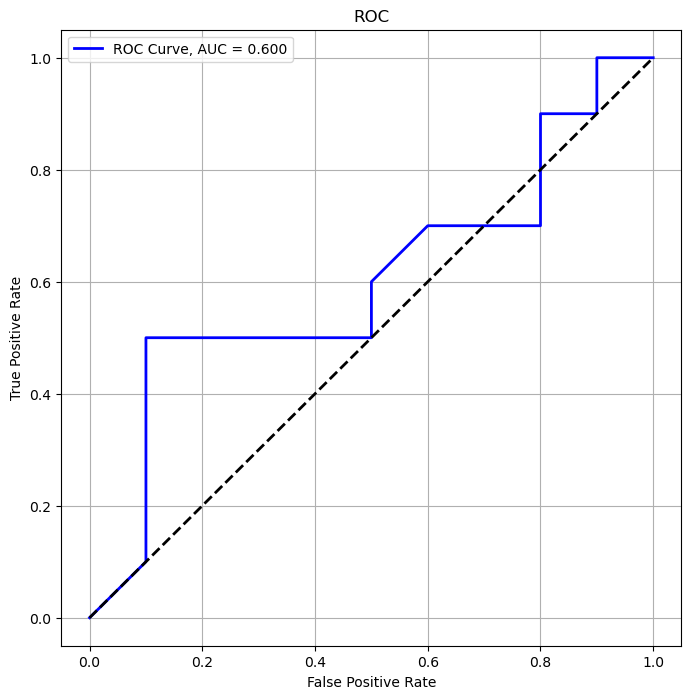

In [ ]:
# Plot the ROC
hF, hA = plt.subplots(figsize = (8, 8))

hA.plot(vFPRoc, vTPRoc, color = 'b', lw = 2, label = f'ROC Curve, AUC = {aucRoc:.3f}')
hA.plot([0, 1], [0, 1], color = 'k', lw = 2, linestyle = '--')
hA.set_xlabel('False Positive Rate')
hA.set_ylabel('True Positive Rate')
hA.set_title('ROC')
hA.grid()
hA.legend()

plt.show()

In [25]:
# Empirical AUC
vIdx0Roc = vYRoc == 0
vIdx1Roc = vYRoc == 1

# Empirical AUC: Count the number of higher score for positive label.
empAuc = np.mean(np.random.choice(vSRoc[vIdx1Roc], 1000) > np.random.choice(vSRoc[vIdx0Roc], 1000))
print(f'Empirical AUC: {empAuc}')

Empirical AUC: 0.59


In [26]:
# Estimation of Label by Score
vYEstRoc = vSRoc > 0.5
vYEstRoc = vYEstRoc.astype(np.int32)

In [27]:
# Balanced Accuracy
# The balanced accuracy is the Mean of TPR (Recall / Sensitivity) and TNR (Specificity).
# It is equivalent to the accuracy weighted by the class frequency.
precisionRoc, recallRoc, f1Roc, _   = precision_recall_fscore_support(vYRoc, vYEstRoc, pos_label = 1, average = 'binary')
tnRoc, fpRoc, fnRoc, tpRoc          = confusion_matrix(vYRoc, vYEstRoc).ravel() #<! Another way to access all measures
specificityRoc = tnRoc / (tnRoc + fpRoc)
0.5 * (recallRoc + specificityRoc)

np.float64(0.7)

In [28]:
# AUC vs. Accuracy
# The AUC and Accuracy are not equivalent!
empAccu = np.mean(vYEstRoc == vYRoc)
print(f'Empirical Accuracy: {empAccu}')

Empirical Accuracy: 0.7


* <font color='brown'>(**#**)</font> For comparison on the AUCROC vs AUCPR see [A Closer Look at AUROC and AUPRC under Class Imbalance](https://arxiv.org/abs/2401.06091).  
  It states that "AUROC favors model improvements uniformly over all positive samples, whereas AUPRC favors improvements for samples assigned higher scores over those assigned lower scores.".  
  Namely optimizing the AUC is equivalent of minimizing the _False Positive Rate_ (FPR) over all positive scores while optimizing for AUCPR is equivalent of minimizing FPR over relatively high scores.
* <font color='brown'>(**#**)</font> While the above paper gives a deep and wide outlook on AUCROC vs. AUCPR, in some cases detailing nuances over guidelines, it is usually better to use AUCPR as a singleton score for imbalanced data.  
  Yet probably should also be validated by another related measures, like the `F1`. See [Imbalanced Data? Stop Using ROC-AUC and Use AUPRC Instead](https://scribe.rip/46af4910a494).